In [9]:
import pandas as pd
from matplotlib import pyplot as plt

taco_data = pd.read_csv("./tacos.csv") 
cols = [c for c in taco_data.columns if c.lower()[0:7] != ('unnamed')]

taco_data=taco_data[taco_data['country'].str.contains('US')]

# print(taco_data['menus.amountMax'])
taco_data = taco_data[["city","country", "menus.currency", "menus.name", "province","menus.amountMax","menus.amountMin","menus.description", "name", "latitude", "longitude"]]
taco_data = taco_data.rename(columns={'menus.amountMax': 'price_max', 'menus.amountMin': 'price_min',"menus.description": "description", "name": "restaurant"})

# taco_data['price_max'] = taco_data['price_max'].fillna((taco_data['price_max'].mode()))
# taco_data['price_min'] = taco_data['price_min'].fillna((taco_data['price_min'].mode()))
# taco_data = pd.notnull(taco_data["price_max"]) 
# taco_data = pd.notnull(taco_data["price_min"])


taco_data['menus.currency'] = "USD"
taco_data['menus.name'] = taco_data["menus.name"].str.lower()
taco_data['province'] = taco_data["province"].str.upper()

# SEPERATE TACOS AND BURRITOS
tacos = taco_data[taco_data["menus.name"].str.contains("taco")]
burritos = taco_data[taco_data["menus.name"].str.contains("burrito")]

# USE STATE ABBREVS
tacos = tacos[tacos["province"].str.len() == 2]
burritos = burritos[burritos["province"].str.len() == 2]

# REMOVE WEIRD STATES
tacos = tacos[tacos['province'] != 'LS']
tacos = tacos[tacos['province'] != 'VI']
tacos = tacos[tacos['province'] != 'DC']
burritos = burritos[burritos['province'] != 'LS']
burritos = burritos[burritos['province'] != 'VI']
burritos = burritos[burritos['province'] != 'DC']


# LIST OF NORTHERN STATES
north = ['WA', 'OR', 
         'ID', 'MT', 
         'WY', 'NE', 
         'SD', 'ND', 
         'MN', 'IA', 
         'MO', 'IL' ,
         'WI','IN',
         'KY','WV',
         'VA','MD',
         'NJ','CT',
         'RI','PA',
         'OH','NY',
         'DE','NH',
         'ME','VT',
         'MA','CT', 'AL']

south = ['CA', 'NV', 
         'UT', 'AZ', 
         'CO', 'NM', 
         'KS', 'OK', 
         'TX', 'AR', 
         'LA', 'HI', 
         'TN', 'MS', 
         'AL', 'GA', 
         'FL', 'SC', 
         'NC']

north_burrito = burritos[~burritos['province'].isin(south)]
south_burrito = burritos[burritos['province'].isin(south)]

tacos_north = tacos[tacos['province'].isin(north)]
tacos_south = tacos[~tacos['province'].isin(north)]

## VISUALIZE TACOS AND BURRITOS 

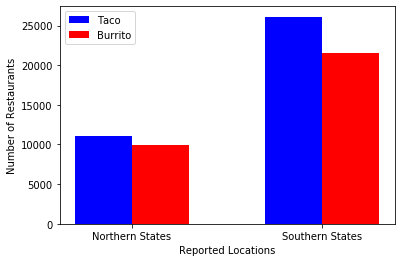

In [10]:
x = ["Northern States", "Southern States"]
barwidth=0.3
nums = [len(tacos_north), len(tacos_south)]
plt.bar(x, nums, width=-barwidth,color="b", align='edge')
plt.xlabel("Reported Taco Locations")
plt.ylabel("Number of Restaurants with Tacos")
# plt.show()

# x = ["North", "South"]
nums = [len(north_burrito), len(south_burrito)]
plt.bar(x, nums, width=barwidth,color="r", align='edge')
plt.xlabel("Reported Locations")
plt.ylabel("Number of Restaurants")
plt.legend(["Taco", "Burrito"])
plt.show()

In [11]:
eth = pd.read_csv("./hispanic_per.csv", sep=",")
eth = eth.dropna(axis=1)

states = {'Alabama': 'AL',
         'Alaska': 'AK',
         'Arizona': 'AZ',
         'Arkansas': 'AR',
         'California': 'CA',
         'Colorado': 'CO',
         'Connecticut': 'CT',
         'Delaware': 'DE',
         'Florida': 'FL',
         'Georgia': 'GA',
         'Hawaii': 'HI',
         'Idaho': 'ID',
         'Illinois':'IL',
         'Indiana': 'IN',
         'Iowa': 'IA',
         'Kansas': 'KS',
         'Kentucky': 'KY',
         'Louisiana':'LA',
         'Maine':'ME',
         'Maryland':'MD',
         'Massachusetts':'MA',
         'Michigan':'MI',
         'Minnesota':'MN',
         'Mississippi':'MS',
         'Missouri':'MO',
         'Montana':'MT',
         'Nebraska':'NE',
         'Nevada': 'NV',
         'New Hampshire':'NH',
         'New Jersey':'NJ',
         'New Mexico':'NM',
         'New York':'NY',
         'North Carolina': 'NC',
         'North Dakota':'ND',
         'Ohio':'OH',
         'Oklahoma':'OK',
         'Oregon' : 'OR',
         'Pennsylvania': 'PA',
         'Rhode Island': 'RI',
         'South Carolina': 'SC',
         'South Dakota': 'SD',
         'Tennessee': 'TN',
         'Texas':'TX',
         'Utah':'UT',
         'Vermont':'VT',
         'Virginia':'VA',
         'Washington':'WA',
         'West Virginia':'WV',
         'Wisconsin':'WI',
         'Wyoming':'WY'}


eth['State'] = eth['State'].apply(lambda cell: states[cell])
eth = eth.sort_values(by="State")

In [12]:
import numpy as np

freq = taco_data['province'].value_counts().sort_index()
freq_burritos = burritos['province'].value_counts().sort_index()
freq_tacos = tacos['province'].value_counts().sort_index()
eth.corrwith(freq)

np.sort(burritos['province'].unique())

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

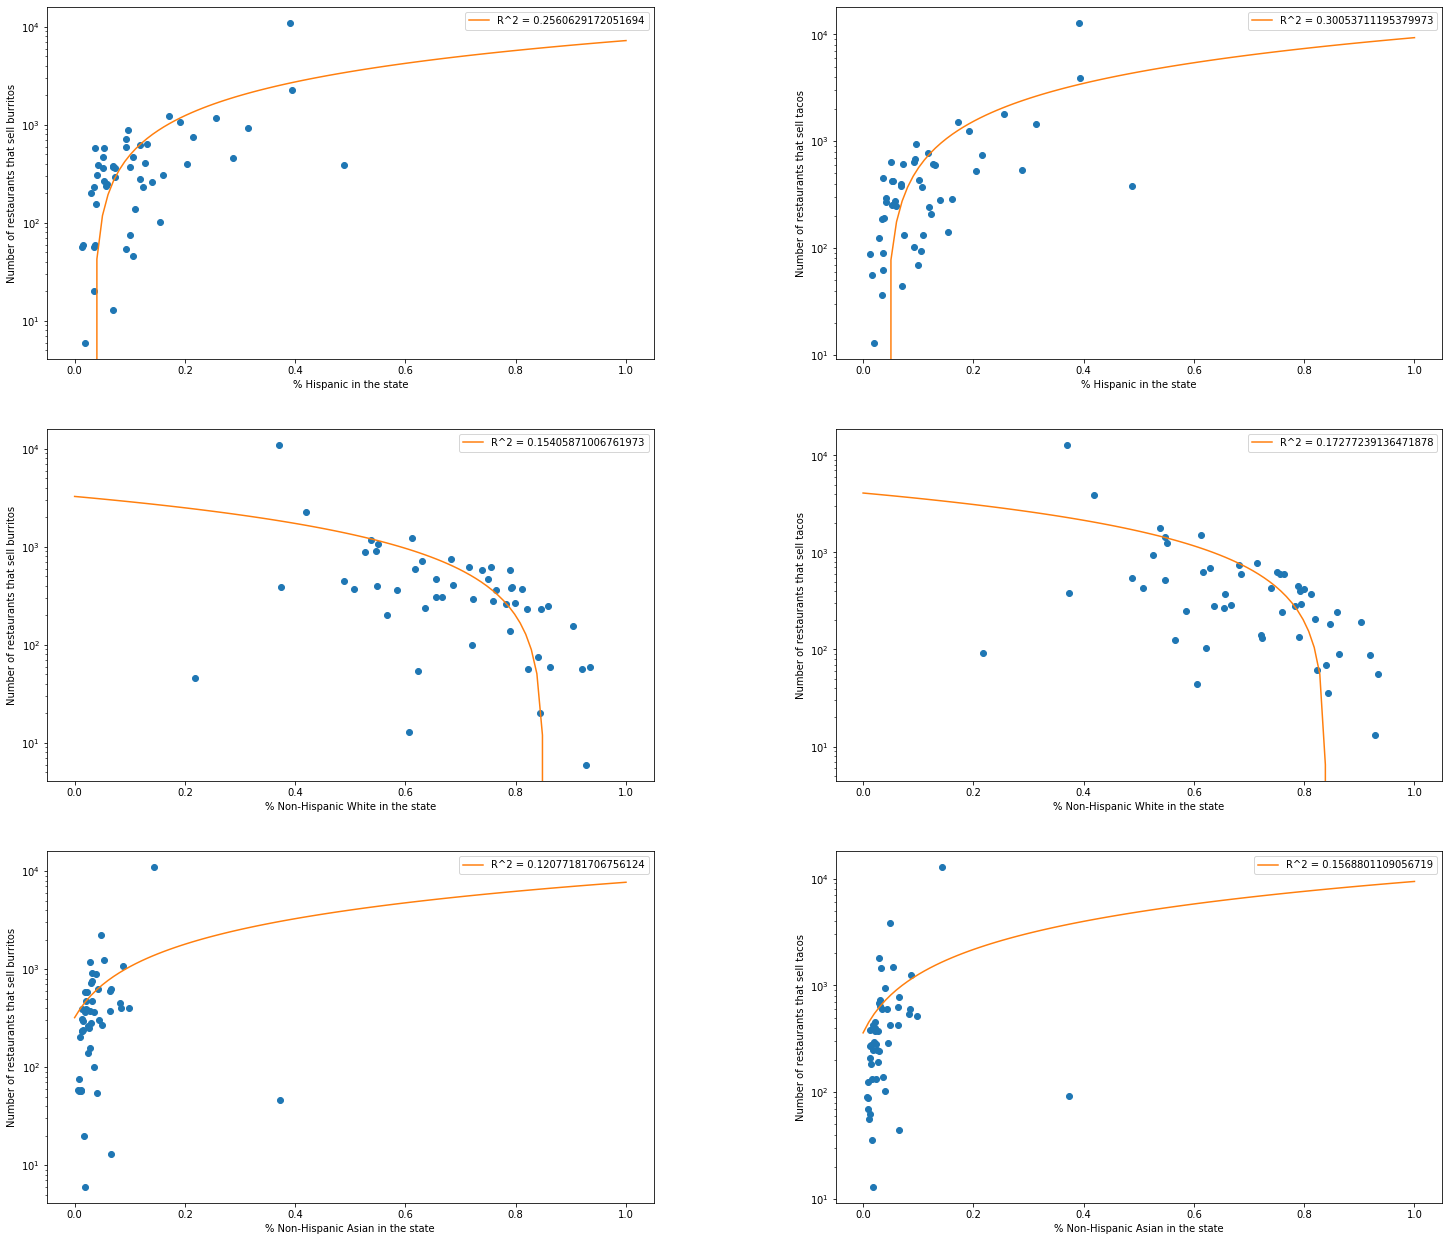

In [13]:
from sklearn.linear_model import LinearRegression

states_list = ['AL','AK', 'AZ', 'AR', 'CA', 'CO', 'CT',
'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',
'WY']
gs = plt.GridSpec(3,2, wspace=0.3, hspace=.2)
plt.figure(figsize=(25,22))
X = np.linspace(0,1, 100)

# Hispanic Burritos
hispanic = eth['Hispanic'].values.reshape(-1,1)
plt.subplot(gs[0,0])
hisp_bur_model = LinearRegression().fit(hispanic, freq_burritos)
plt.semilogy(eth['Hispanic'], freq_burritos,"o")
plt.plot(X, hisp_bur_model.coef_[0] * X + hisp_bur_model.intercept_, label=f"R^2 = {hisp_bur_model.score(hispanic, freq_burritos)}")
plt.xlabel("% Hispanic in the state")
plt.ylabel("Number of restaurants that sell burritos")
plt.legend()

# Hispanic Tacos
plt.subplot(gs[0,1])
hisp_taco_model = LinearRegression().fit(hispanic, freq_tacos)
plt.semilogy(eth['Hispanic'], freq_tacos,"o")
plt.plot(X, hisp_taco_model.coef_[0] * X + hisp_taco_model.intercept_, label=f"R^2 = {hisp_taco_model.score(hispanic, freq_tacos)}")
plt.xlabel("% Hispanic in the state")
plt.ylabel("Number of restaurants that sell tacos")
plt.legend()
# plt.show()

# White Burritos
white = eth['Non-Hispanic White'].values.reshape(-1,1)
plt.subplot(gs[1,0])
white_burr_model = LinearRegression().fit(white, freq_burritos)
plt.semilogy(eth['Non-Hispanic White'], freq_burritos,"o")
plt.plot(X, white_burr_model.coef_[0] * X + white_burr_model.intercept_, label=f"R^2 = {white_burr_model.score(white, freq_burritos)}")
plt.xlabel("% Non-Hispanic White in the state")
plt.ylabel("Number of restaurants that sell burritos")
plt.legend()
# plt.show()

# White Tacos
plt.subplot(gs[1,1])
white_taco_model = LinearRegression().fit(white, freq_tacos)
plt.semilogy(eth['Non-Hispanic White'], freq_tacos,"o")
plt.plot(X, white_taco_model.coef_[0] * X + white_taco_model.intercept_, label=f"R^2 = {white_taco_model.score(white, freq_tacos)}")
plt.xlabel("% Non-Hispanic White in the state")
plt.ylabel("Number of restaurants that sell tacos")
plt.legend()

# Asian Burritos
asian = eth['Non-Hispanic Asian'].values.reshape(-1,1)
plt.subplot(gs[2,0])
asian_bur_model = LinearRegression().fit(asian, freq_burritos)
plt.semilogy(eth['Non-Hispanic Asian'], freq_burritos,"o")
plt.plot(X, asian_bur_model.coef_[0] * X + asian_bur_model.intercept_, label=f"R^2 = {asian_bur_model.score(hispanic, freq_burritos)}")
plt.xlabel("% Non-Hispanic Asian in the state")
plt.ylabel("Number of restaurants that sell burritos")
plt.legend()

# Asian Tacos
plt.subplot(gs[2,1])
asian_taco_model = LinearRegression().fit(asian, freq_tacos)
plt.semilogy(eth['Non-Hispanic Asian'], freq_tacos,"o")
plt.plot(X, asian_taco_model.coef_[0] * X + asian_taco_model.intercept_, label=f"R^2 = {asian_taco_model.score(hispanic, freq_tacos)}")
plt.xlabel("% Non-Hispanic Asian in the state")
plt.ylabel("Number of restaurants that sell tacos")
plt.legend()
plt.show()



160 651 238 366


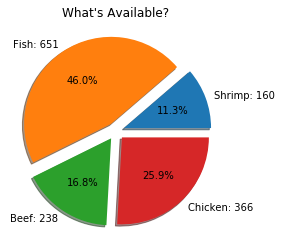

In [14]:
# CLEANED NAN PRICES
tacos = tacos[np.isfinite(tacos['price_max'])]
tacos = tacos[np.isfinite(tacos['price_min'])]
ingredients = tacos[~tacos['description'].isnull()]

pd.options.mode.chained_assignment = None  # default='warn'
# CREATE TACO CATEGORIES
shrimp_tacos = ingredients[ingredients["menus.name"].str.contains(" shrimp ") 
                           | ingredients["menus.name"].str.contains(" camaron ")]

fish_tacos = ingredients[ingredients["menus.name"].str.contains(" fish ") 
                         | ingredients["menus.name"].str.contains(" pescado ")]

beef_tacos = ingredients[ingredients["menus.name"].str.contains(" beef ") 
                         | ingredients["menus.name"].str.contains(" steak ")]

chicken_tacos = ingredients[ingredients["menus.name"].str.contains(" chicken ") 
                            | ingredients["menus.name"].str.contains(" pollo ")]

# MAKE NAMES EASIER TO FIND   
shrimp_tacos['menus.name'] = "shrimp tacos"
fish_tacos['menus.name'] = "fish tacos"
beef_tacos['menus.name'] = "beef tacos"
chicken_tacos['menus.name'] = "chicken tacos"

# GET ROW COUNTS FOR TACO TYPES
shrimp_row, shrimp_col = shrimp_tacos.shape
fish_row, fish_col = fish_tacos.shape
beef_row, beef_col = beef_tacos.shape
chicken_row, chicken_col = chicken_tacos.shape


print(shrimp_row, fish_row, beef_row, chicken_row)

labels = ["Shrimp: "+str(shrimp_row), 
          "Fish: "+str(fish_row), 
          "Beef: "+str(beef_row),
          "Chicken: "+str(chicken_row)]

explode = [0.1, 0.1, 0.1, 0.1]
plt.title("What's Available?")
plt.pie([shrimp_row, fish_row, beef_row, chicken_row], labels=labels, explode=explode, autopct='%1.1f%%',shadow=True)
plt.show()

In [16]:
import seaborn as sns
import plotly.graph_object as go
# CLEANED NAN PRICES
tacos = tacos[np.isfinite(tacos['price_max'])]
tacos = tacos[np.isfinite(tacos['price_min'])]
tacos = tacos[np.isfinite(tacos['latitude'])]
tacos = tacos[np.isfinite(tacos['longitude'])]
tacos['avg'] = tacos[['price_max', 'price_min']].mean(axis=1)
tacos = tacos[["city", "avg", "latitude", "longitude"]]
tacos.describe()
df = pd.DataFrame(tacos)
# saving the dataframe
df.to_csv('tacos_avg_per_state.csv')

df = pd.read_csv('tacos_avg_per_state.csv')
df['text'] = df['city'] + '<br>Average price ' + (df['avg']).astype(str)
limits = [(0,13424)]
colors = ["royalblue","crimson","lightseagreen","orange","peachpuff"]
cities = []
#scale = 5000
fig = go.Figure()
for i in range(len(limits)):
   lim = limits[i]
   df_sub = df[lim[0]:lim[1]]
   fig.add_trace(go.Scattergeo(
       locationmode = 'USA-states',
       lon = df_sub['longitude'],
       lat = df_sub['latitude'],
       text = df_sub['text'],
       marker = dict(
           size = df_sub['avg'],
           color = colors[i],
           line_color='rgb(40,40,40)',
           line_width=0.5,
           sizemode = 'area'
       ),
       name = '{0} - {1}'.format(lim[0],lim[1])))
fig.update_layout(
       title_text = 'Title<br>(Click legend to toggle traces)',
       showlegend = True,
       geo = dict(
           scope = 'usa',
           landcolor = 'rgb(217, 217, 217)',
       )
   )
fig.show()

ModuleNotFoundError: No module named 'plotly'